In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import isbnlib
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance # To calculate distances
from IPython.display import Image
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")
print('Libraries imported!')  

Libraries imported!


Combining the data to make the data framne

In [105]:
cities=["Mumbai","Chennai","Kolkata","New Delhi","Lucknow","Hyderabad","Jammu","Dehradun","Bhopal","Bangalore","Ranchi","Patna","Indore","Amritsar","Pune","Ahmedabad","Aurangabad","Varanasi","Jaipur","Chandigarh","Guwahati","Mysore","Thiruvananthapuram","Visakhapatnam","Coimbatore","Surat","Nagpur","Kota","Ludhiana","Allahabad"]


In [77]:
data={
      'AQI':[54.96453900709219, 1.4184397163120568, 0.0, 92.5531914893617, 56.38297872340425, 34.751773049645394, 2.8368794326241136, 6.382978723404255, 100.0, 6.028368794326241, 81.91489361702128, 7.801418439716312, 68.79432624113475, 54.25531914893617, 59.21985815602837, 17.02127659574468, 50.35460992907801, 8.865248226950355, 77.6595744680851, 34.751773049645394, 1.773049645390071, 7.446808510638298, 2.4822695035460995, 11.347517730496454, 0.0, 59.9290780141844, 53.191489361702125, 99.29078014184397, 62.76595744680851, 29.78723404255319],
      'Literacy Rate' : [66.07706885660146, 68.91977258370191, 44.47252053063807, 52.55843335439045, 20.404295641187645, 25.205306380290647, 68.6670878079596, 57.422615287428954, 26.53190145293748, 59.633607075173714, 51.16866708780802, 25.90018951358186, 41.69298799747321, 31.080227416298182, 65.00315855969683, 56.98041692988004, 42.70372710044224, 0.0, 25.64750473783956, 45.16740366392929, 77.0688566013898, 53.06380290587496, 100.0, 15.919140871762544, 75.99494630448517, 54.45356917245739, 79.91156032849025, 22.29943145925459, 41.0612760581175, 34.68098547062546],
      'Population Density': [30.664659738600246, 4.217206331732653, 8.439250067765936, 100.0, 0.4273195354271325, 12.001047298613031, 0.0034738769785607406, 0.06746078603615056, 0.2471203563789827, 1.4840356048707184, 0.07758070905187249, 0.19963110043297572, 0.19107090173366614, 0.1594113078531271, 0.07337633149736396, 0.26299966050219215, 0.0, 0.2982282528056325, 0.10187165897909362, 3.2602602443537743, 1.7112556435825876, 0.046505393934107284, 0.12737566401176958, 0.6342059490789641, 0.08217387498202089, 0.3874257162128608, 0.09019367804164631, 0.07038517187806168, 0.16238887302765628, 0.07461842313770209],
      'Crime Rate': [47.49631811487482, 28.092783505154628, 51.47275405007363, 100.0, 52.945508100147265, 40.16936671575846, 33.76288659793813, 10.309278350515456, 44.21944035346097, 78.46097201767304, 70.61855670103093, 70.58173784977907, 62.73932253313698, 12.113402061855668, 36.41384388807067, 0.0, 24.88954344624447, 15.574374079528708, 9.131075110456543, 38.991163475699544, 48.122238586156094, 65.57437407952871, 24.85272459499264, 16.642120765832093, 20.287187039764355, 7.142857142857135, 23.269513991163453, 24.11634756995581, 82.21649484536083, 23.600883652430035],
      'Safety Index': [52.50368188512519, 71.90721649484537, 48.52724594992637, 0.0, 47.054491899852735, 59.83063328424154, 66.23711340206188, 89.69072164948454, 55.78055964653903, 21.539027982326957, 29.381443298969064, 29.418262150220926, 37.26067746686303, 87.88659793814436, 63.58615611192933, 100.0, 75.11045655375553, 84.42562592047129, 90.86892488954348, 61.00883652430045, 51.877761413843906, 34.42562592047129, 75.14727540500736, 83.35787923416791, 79.71281296023565, 92.85714285714286, 76.73048600883655, 75.8836524300442, 17.78350515463917, 76.39911634756996],
      'Property Price/Income':[71.87760778859527, 12.545201668984705, 15.104311543810853, 15.326842837273997, 8.150208623087622, 2.94853963838665, 57.02364394993047, 56.35605006954104, 30.625869262865095, 5.396383866481226, 16.63421418636996, 45.78581363004173, 11.376912378303203, 4.255910987482616, 5.7858136300417256, 10.097357440890125, 8.178025034770517, 4.116828929068152, 26.759388038942983, 9.707927677329623, 6.703755215577193, 0.0, 6.342141863699584, 12.600834492350488, 14.770514603616133, 10.9874826147427, 17.413073713490963, 1.335187760778861, 100.0, 6.036161335187761],
      'Average Rainfall': [97.65765765765767, 69.41441441441441, 81.08108108108108, 35.585585585585584, 44.0990990990991, 36.171171171171174, 31.98198198198198, 100.0, 50.36036036036036, 40.765765765765764, 64.32432432432432, 50.27027027027027, 47.83783783783784, 34.234234234234236, 33.37837837837838, 35.54054054054054, 33.648648648648646, 46.08108108108108, 27.432432432432428, 47.88288288288288, 77.56756756756756, 35.99099099099099, 0.0, 0.0, 28.82882882882883, 51.306306306306304, 49.27927927927928, 34.5045045045045, 33.01801801801802, 43.15315315315315],
      'Traffic': [87.98877274487032, 58.4736740224545, 92.1215640727836, 100.0, 48.257839721254356, 49.19667053813395, 8.17363530778165, 39.40185830429733, 24.395083236546654, 84.82384823848238, 25.958188153310104, 8.449477351916373, 30.395857530003873, 23.05458768873403, 58.57530003871467, 36.27564847077043, 17.54258614014712, 54.3892760356175, 60.017421602787465, 29.62640340689121, 7.834881920247773, 0.0, 51.58246225319396, 33.749516066589244, 59.60123886953156, 9.073751451800232, 6.141114982578396, 31.475029036004642, 7.147696476964768, 81.2862950058072],
      'Unemployment Rate': [7.393436439079593, 7.280271595624295, 15.42814032440588, 34.13806110901547, 5.846850245190497, 23.651452282157674, 76.53715579026782, 6.8443773837964725, 0.5281026027914001, 3.734439834024894, 49.000377216144855, 53.753300641267465, 0.5281026027914001, 25.08487363259148, 7.393436439079593, 0.0, 7.393436439079593, 5.846850245190497, 100.0, 38.28743870237647, 23.93059222934742, 3.734439834024894, 14.673708034703884, 16.93700490380988, 7.280271595624295, 0.0, 7.393436439079593, 100.0, 25.08487363259148, 5.846850245190497],
      'Life Expectancy': [68.93203883495146, 67.96116504854362, 63.10679611650478, 100.0, 0.0, 40.77669902912619, 83.49514563106794, 48.543689320388296, 13.59223300970878, 37.864077669902926, 36.89320388349521, 34.95145631067966, 13.59223300970878, 69.90291262135916, 68.93203883495146, 44.660194174757315, 68.93203883495146, 0.0, 33.009708737864095, 52.42718446601942, 18.446601941747605, 37.864077669902926, 93.20388349514562, 45.63106796116503, 67.96116504854362, 44.660194174757315, 68.93203883495146, 33.009708737864095, 69.90291262135916, 0.0],
      'Factories': [65.7216160883199, 100.0, 24.3605359317905, 7.797963044548682, 41.29369995076062, 38.927618109726076, 3.7577422447974707, 7.046414595589188, 11.716381164640941, 36.07173400367999, 6.802809236271283, 8.238525928421488, 11.716381164640941, 33.280638557026975, 65.7216160883199, 73.15676264026744, 65.7216160883199, 41.29369995076062, 24.474563972322287, 0.0, 12.817788374322959, 36.07173400367999, 19.555808951201183, 43.21144426879519, 100.0, 73.15676264026744, 65.7216160883199, 24.474563972322287, 33.280638557026975, 41.29369995076062],
      'Workers Engaged': [0.24449667091183208, 0.18641264327258938, 0.22709061436435385, 0.0, 0.19326447192177584, 0.09664443076839568, 100.0, 0.6023170651431536, 0.28179991813248095, 0.22716955869633726, 0.20261513408192924, 0.022023972274389517, 0.28179991813248095, 0.09146524190963551, 0.24449667091183208, 0.20787204584832522, 0.24449667091183208, 0.19326447192177584, 0.15055811051827273, 0.03931622891924051, 0.09186707037443921, 0.22716955869633726, 0.055791180964035784, 0.031624922405321644, 0.18641264327258938, 0.20787204584832522, 0.24449667091183208, 0.15055811051827273, 0.09146524190963551, 0.19326447192177584],
      'Food Prices': [58.561948265694994, 60.217921298374385, 48.7680317552522, 60.54555136024785, 26.884367931419924, 66.098319823269, 37.83148065024336, 25.423344687068184, 26.77743159154719, 100.0, 0.0, 59.35780987334864, 28.491493500206833, 40.57419973771992, 59.58356436863552, 61.757496545472144, 6.8003590948696955, 14.36225455249562, 37.61562766790766, 40.823057763226224, 52.002525985970664, 28.173984984905694, 40.6135857559035, 54.35556553041305, 50.81456446545032, 56.3096841197335, 41.8143092264498, 28.234714264339587, 40.04303857629446, 16.362360168633767],
      'HealthCare Index': [79.97225593896304, 87.75793306745274, 68.5104907230796, 80.1456563204439, 77.24986994971388, 80.73521761747877, 35.21761747875845, 100.0, 63.429859545690995, 81.23807872377317, 45.03207907057396, 62.45881740939829, 56.910005202011426, 87.49783249523148, 77.75273105600833, 80.5618172359979, 57.39552627015778, 93.01196462632217, 93.96566672446679, 76.07074735564419, 77.28455002601005, 71.68371770417895, 75.20374544823999, 87.22039188486214, 87.30709207560255, 82.3998612796948, 80.2323565111843, 69.84567366048205, 77.09380960638113, 0.0],
      'Pollution Index': [81.74703357737944, 58.773037111840445, 69.57838929563242, 100.0, 67.38197424892704, 63.03963645544054, 40.89876293865186, 47.26079272910881, 18.606412522090373, 78.4397879323403, 28.47765715728352, 96.56652360515021, 23.100227215349655, 83.86771017419844, 52.41100732138351, 53.85003786922494, 59.60616006059076, 93.20878566018683, 25.347134561979296, 0.0, 62.660944206008566, 13.582428679626346, 12.320121181519808, 37.56627114365058, 30.371118404443326, 11.688967432466537, 25.70058066144913, 49.002777076495825, 89.8258015652613, 95.27896995708154]
      }


In [78]:
df = pd.DataFrame(data)  
df

,AQI,Literacy Rate,Population Density,Crime Rate,Safety Index,Property Price/Income,Average Rainfall,Traffic,Unemployment Rate,Life Expectancy,Factories,Workers Engaged,Food Prices,HealthCare Index,Pollution Index
0,54.964539,66.077069,30.664660,47.496318,52.503682,71.877608,97.657658,87.988773,7.393436,68.932039,65.721616,0.244497,58.561948,79.972256,81.747034
1,1.418440,68.919773,4.217206,28.092784,71.907216,12.545202,69.414414,58.473674,7.280272,67.961165,100.000000,0.186413,60.217921,87.757933,58.773037
2,0.000000,44.472521,8.439250,51.472754,48.527246,15.104312,81.081081,92.121564,15.428140,63.106796,24.360536,0.227091,48.768032,68.510491,69.578389
3,92.553191,52.558433,100.000000,100.000000,0.000000,15.326843,35.585586,100.000000,34.138061,100.000000,7.797963,0.000000,60.545551,80.145656,100.000000
4,56.382979,20.404296,0.427320,52.945508,47.054492,8.150209,44.099099,48.257840,5.846850,0.000000,41.293700,0.193264,26.884368,77.249870,67.381974
5,34.751773,25.205306,12.001047,40.169367,59.830633,2.948540,36.171171,49.196671,23.651452,40.776699,38.927618,0.096644,66.098320,80.735218,63.039636
6,2.836879,68.667088,0.003474,33.762887,66.237113,57.023644,31.981982,8.173635,76.537156,83.495146,3.757742,100.000000,37.831481,35.217617,40.898763
7,6.382979,57.422615,0.067461,10.309278,89.690722,56.356050,100.000000,39.401858,6.844377,48.543689,7.046415,0.602317,25.423345,100.000000,47.260793
8,100.000000,26.531901,0.247120,44.219440,55.780560,30.625869,50.360360,24.395083,0.528103,13.592233,11.716381,0.281800,26.777432,63.429860,18.606413
9,6.028369,59.633607,1.484036,78.460972,21.539028,5.396384,40.765766,84.823848,3.734440,37.864078,36.071734,0.227170,100.000000,81.238079,78.439788


In [79]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
AQI                      0
Literacy Rate            0
Population Density       0
Crime Rate               0
Safety Index             0
Property Price/Income    0
Average Rainfall         0
Traffic                  0
Unemployment Rate        0
Life Expectancy          0
Factories                0
Workers Engaged          0
Food Prices              0
HealthCare Index         0
Pollution Index          0
dtype: int64


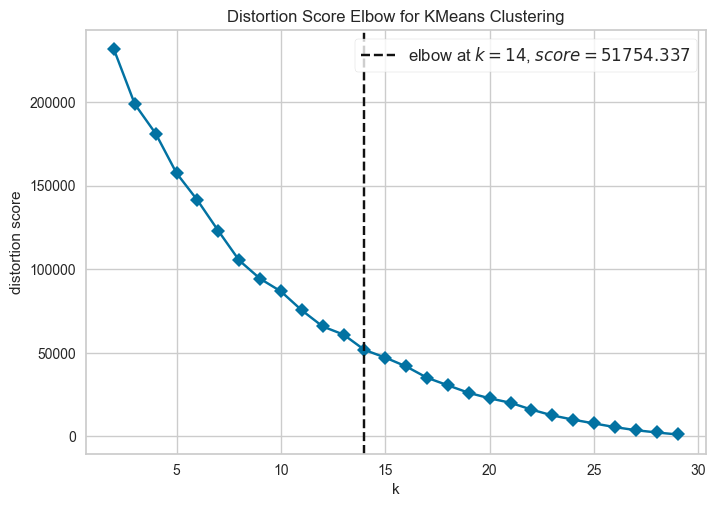

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
# Fit data to visualizer
visualizer.fit(df)
# Finalize and render figure
visualizer.show()

In [81]:
kmeans = KMeans(n_clusters = 14, init = 'k-means++', n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

In [82]:
df[y_kmeans == 3]

,AQI,Literacy Rate,Population Density,Crime Rate,Safety Index,Property Price/Income,Average Rainfall,Traffic,Unemployment Rate,Life Expectancy,Factories,Workers Engaged,Food Prices,HealthCare Index,Pollution Index
3,92.553191,52.558433,100.0,100.0,0.0,15.326843,35.585586,100.0,34.138061,100.0,7.797963,0.0,60.545551,80.145656,100.0


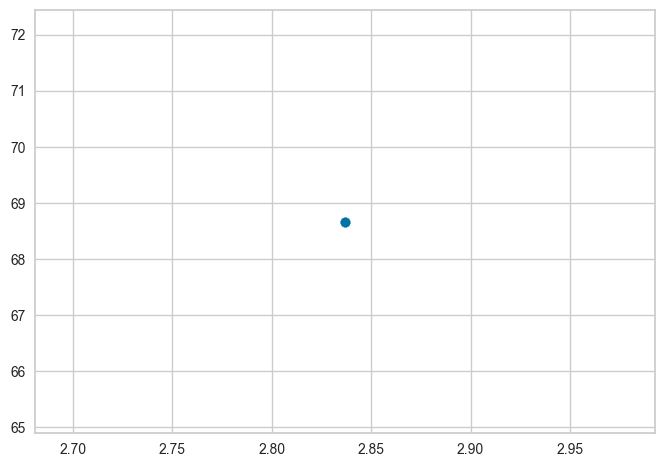

In [83]:
filtered_label0 = df[y_kmeans == 0].iloc[:,:-1].values
# filtered_label0.to_numpy()[:,1]
# plt.scatter(filtered_label0[:,0])
# Y = filtered_label0

plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

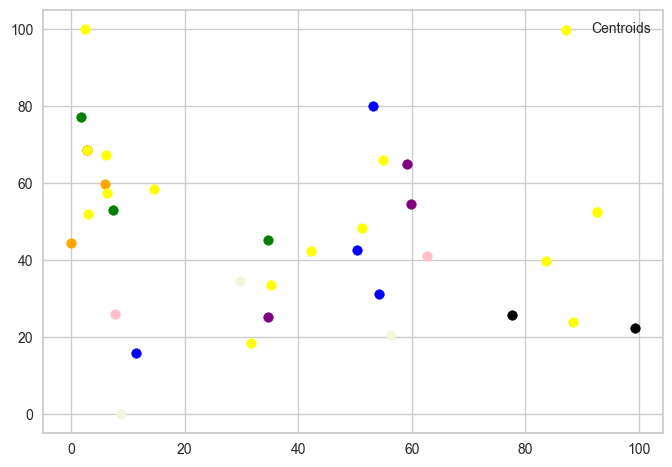

In [84]:
colors=["red","green","blue","yellow","pink","black","orange","purple","beige","brown"]
for i in range (0,9):
    filtered_label0=df[y_kmeans == i].iloc[:,:-1].values
    plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], c = colors[i])
    # filtered_label0=df[y_kmeans == 1].iloc[:,:-1].values
    # plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], c = 'blue')
    # filtered_label0=df[y_kmeans == 2].iloc[:,:-1].values
    # plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], c = 'green')
    # filtered_label0=df[y_kmeans == 3].iloc[:,:-1].values
    # plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], c = 'black')
    # filtered_label0=df[y_kmeans == 4].iloc[:,:-1].values
    # plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], c = 'pink')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'yellow', label = 'Centroids')
# k_means.cluster_centers

plt.legend()

In [85]:
centroids  = kmeans.cluster_centers_  #means of shape [10,] 
for x in centroids:
    print(x)
# print(centroids)
# kmeans==0


[2.83687943e+00 6.86670878e+01 3.47387698e-03 3.37628866e+01
 6.62371134e+01 5.70236439e+01 3.19819820e+01 8.17363531e+00
 7.65371558e+01 8.34951456e+01 3.75774224e+00 1.00000000e+02
 3.78314807e+01 3.52176175e+01 4.08987629e+01]
[14.6572104  58.43335439  1.67267376 50.89592538 49.10407462  5.47056096
 53.81381381 12.48709511 21.98415692 36.24595469 16.29650746  0.11945095
 40.33318958 75.01300503 25.41445763]
[42.28723404 42.40366393  0.22095273 19.22864507 80.77135493 10.61196106
 29.29054054 20.12195122 14.20218785 63.34951456 51.98382875  0.15302088
 35.8861084  78.08652679 51.68518051]
[ 92.55319149  52.55843335 100.         100.           0.
  15.32684284  35.58558559 100.          34.13806111 100.
   7.79796304   0.          60.54555136  80.14565632 100.        ]
[3.52836879e+01 3.34807328e+01 1.81009987e-01 7.63991163e+01
 2.36008837e+01 7.28929068e+01 4.16441441e+01 7.79858691e+00
 3.94190871e+01 5.24271845e+01 2.07595822e+01 5.67446071e-02
 4.97004242e+01 6.97763135e+01 9.319

In [136]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
# import numpy as np
# import pandas as pd
from sklearn.metrics import silhouette_score
from scipy.spatial import distance # To calculate distances
# from google.colab import files
from IPython.display import Image
import scipy.cluster.hierarchy as sch
import sklearn


In [139]:
sklearn.metrics.davies_bouldin_score(df, y_kmeans)

1.0173800135779325

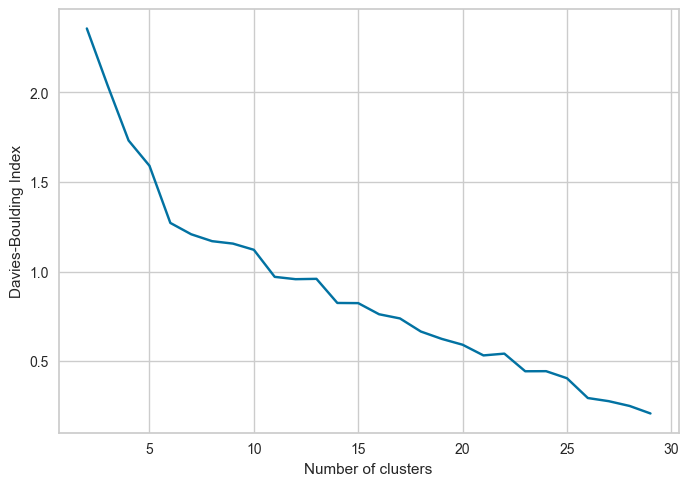

In [141]:
results = {}

for i in range(2,30):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(df)
    db_index = sklearn.metrics.davies_bouldin_score(df, labels)
    results.update({i: db_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()



In [87]:
!pip3 install yellowbrick

In [88]:
import yellowbrick as yellowbrick

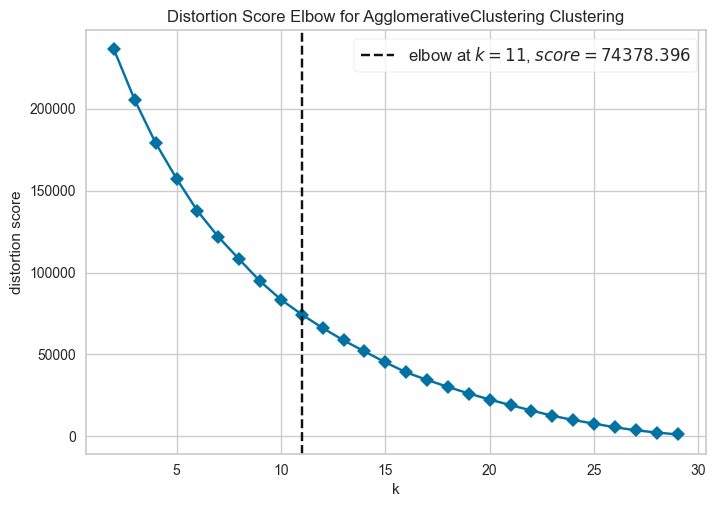

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
# Fit data to visualizer
visualizer.fit(df)
# Finalize and render figure
visualizer.show()


In [90]:
y_AggClus = AgglomerativeClustering(n_clusters=11,linkage = 'average').fit(df)


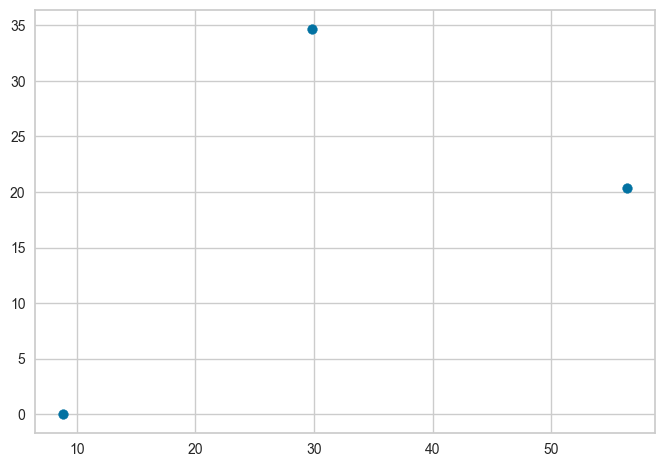

In [91]:
y_AggClus
filtered_label1=df[y_AggClus.labels_ == 0].iloc[:,:-1].values
filtered_label1
# # filtered_label0.to_numpy()[:,1]
# plt.scatter(filtered_label0[:,0])
# # Y = filtered_label0

plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
# plt.show()


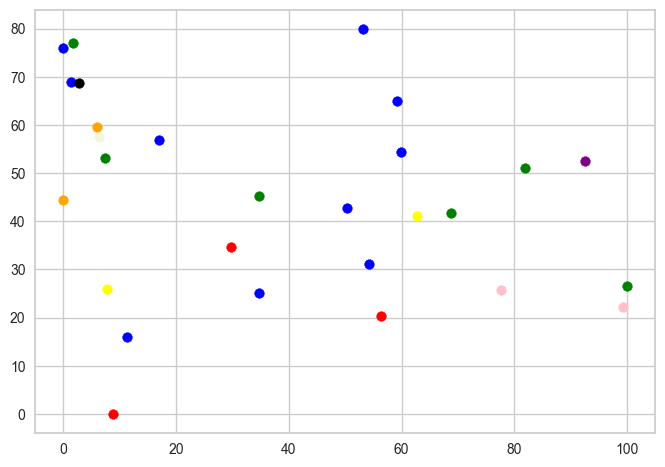

In [92]:
# colors=["red","green","blue","yellow","pink","black","orange","purple","beige","brown"]
for i in range (0,9):
    filtered_label1=df[y_AggClus.labels_ == i].iloc[:,:-1].values
    plt.scatter(filtered_label1[:,0] , filtered_label1[:,1], c = colors[i])

In [23]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=4, min_samples=10)
dbscan.fit(df)
# print(dbscan.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


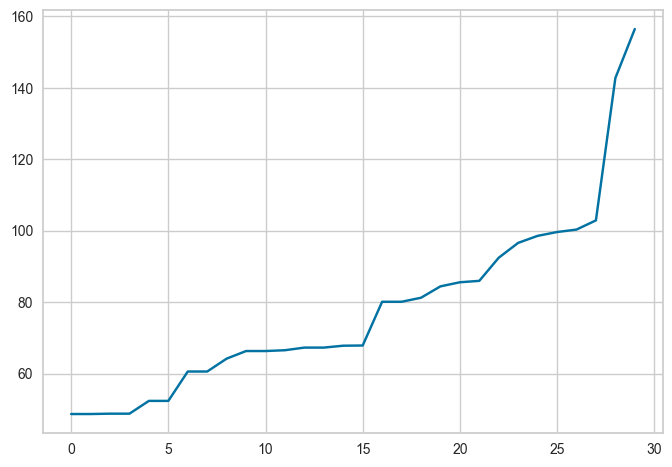

In [22]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
 
neighbors = NearestNeighbors(n_neighbors=26)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


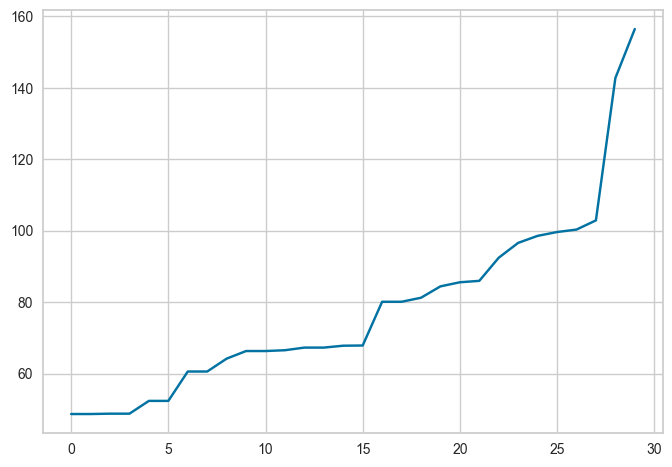

In [90]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_model.fit(df)
distances, indices = nn_model.kneighbors(df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [134]:
user = pd.read_csv('/Users/namanjain/Downloads/user_data.csv')
user.to_numpy()


array([[77, 10, 62, 74, 95, 22, 78, 17, 80, 24, 78, 20, 78, 18, 83]])

Calculating distance of each centroid from the point.

In [94]:
import math

In [95]:
def closest_cluster(lst):
    arr = np.array(lst)
    min_pos = np.argmin(arr)
    print(f"The Point belong to the cluster {min_pos}")
    

In [96]:
p=user.to_numpy()
np.size(p)
distance=[]
for x in centroids:
    distance=np.append(distance,np.linalg.norm(p-x))
closest_cluster(distance)


The Point belong to the cluster 7


In [122]:

data_top = df[y_kmeans == 7].head() 
indexes=[]
for row in data_top.index:
    indexes=np.append(indexes,cities[row])
indexes




array(['Hyderabad', 'Pune', 'Surat'], dtype='<U32')

Within Cluster Distance

In [1]:
cluster_W=df[y_kmeans == 7].to_numpy()
wClust_dist=[]
recom_cities={}
for x in cluster_W:
    wClust_dist=np.append(wClust_dist,np.linalg.norm(p-x))
for i in range(0,np.size(wClust_dist)):
    recom_cities[indexes[i]]=wClust_dist[i]
listt=sorted(recom_cities.items(), key=lambda x:x[1])
print(listt)


NameError: name 'df' is not defined